In [1]:
import torch
import context
from ccn import Constraint, ConstraintsGroup, Clause, ClausesGroup, Literal
import matplotlib.pyplot as plt
import networkx as nx

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


/jmain02/home/J2AD009/ttl04/aat50-ttl04/anaconda3/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [8]:
constraints = ConstraintsGroup('../constraints/full')
print(len(constraints))

clauses = ClausesGroup.from_constraints_group(constraints)
print(len(clauses))

centrality = 'katz'
constraints = clauses.stratify(centrality)
strata = len(constraints)
print(strata)

print(constraints[0].heads())
print(constraints[1].heads())

lens = [len(group) for group in constraints]
print(lens)
print(sum(lens))

243
243
15
{12, 30}
{33, 10, 36}
[2, 6, 14, 23, 58, 26, 7, 15, 27, 29, 30, 31, 32, 33, 30]
363


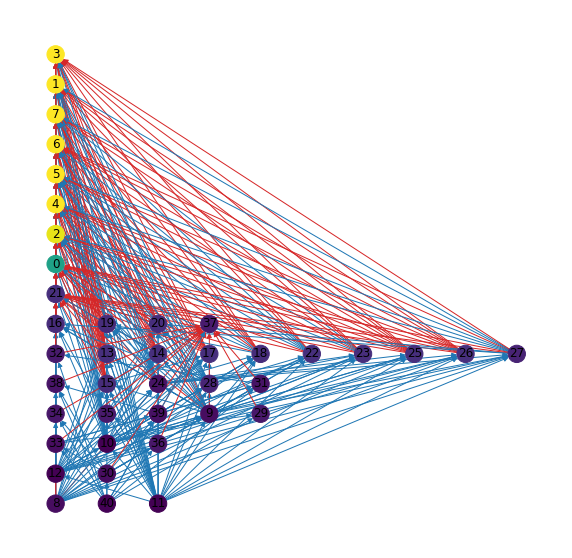

In [12]:
aux = ConstraintsGroup([])
for group in constraints:
  aux = aux + group 

G = aux.graph()

plt.figure(figsize=(10, 10))
ax = plt.subplot()

pos = dict()
for aid, atom in enumerate(aux.atoms().difference(aux.heads())):
  pos[atom] = (aid, -1)
for gid, group in enumerate(constraints):
  for aid, atom in enumerate(group.heads()):
    pos[atom] = (aid, gid)

difficulty = clauses.difficulty(centrality)
edge_color = ['tab:blue' if G[edge[0]][edge[1]]['body'] else 'tab:red' for edge in G.edges()]
node_color = [difficulty[node] for node in G.nodes()]

nx.draw(G, with_labels=True, pos=pos, edge_color=edge_color, node_color=node_color)
plt.show()

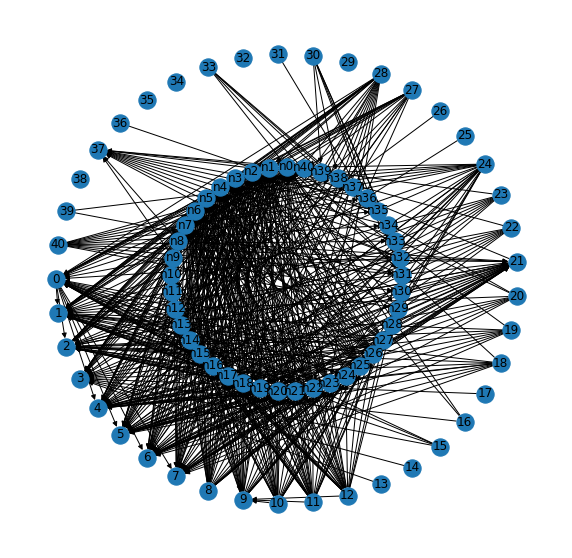

In [4]:
G = aux.duograph()

outer = [str(Literal(atom, True)) for atom in range(41)]
inner = [str(Literal(atom, False)) for atom in range(41)]

plt.figure(figsize=(10, 10))
ax = plt.subplot()
pos = nx.shell_layout(G, [inner, outer])
nx.draw(G, pos=pos, with_labels=True)
plt.show()

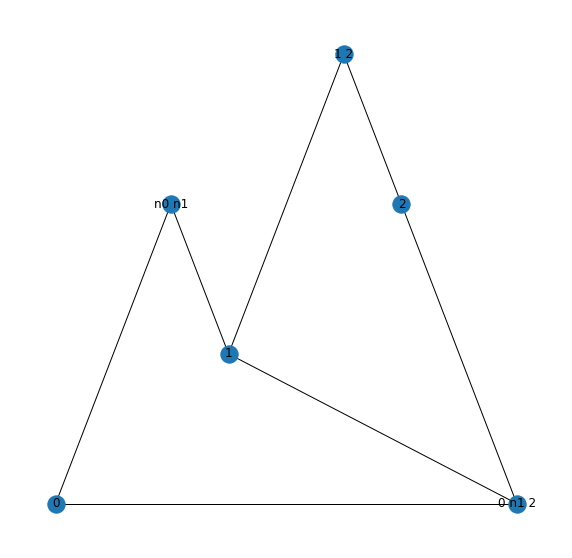

In [5]:
constraints = ConstraintsGroup('../constraints/example')
clauses = ClausesGroup.from_constraints_group(constraints)

plt.figure(figsize=(10, 10))
ax = plt.subplot()
nx.draw_planar(clauses.graph(), with_labels=True)
plt.show()

